<a href="https://colab.research.google.com/github/cardonasebastian/data-science-bourbaki/blob/main/Modulo1/Examen_Modulo1/Examen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examen Modulo 1.

## Paso 1. Cargar librerías y módulos requerdidos

In [71]:
import random        # Módulo para aleatorizar.

import numpy as np   # Biblioteca para manejar matrices y operaciones de matrices
import pandas as pd  # Biblioteca para manejar tablas de datos.

# Sklearn (Scikit-learn) es la  principal biblioteca para machine learning.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron

# Bibliotecas para gráficar y visualizar.
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive #se utiliza para leer los archivos de google drive
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Paso 2. Leer datos desde Drive

In [12]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
df = pd.read_csv("/content/drive/MyDrive/Curso_Ciencia_De_Datos/Examen_Modulo1/Datos/FraudeCanastas.csv")
df.shape

(9319, 2457)

## Paso 3. Analisis de datos.

In [20]:
df.head()

,ID,APPLE PRODUCTDESCRIPTION | SAMSUNG | MODEL90,AUDIO ACCESSORIES | AB AUDIO | AB AUDIO GO AIR TRUE WIRELESS BLUETOOTH IN-EAR H,AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH CHARGING CASE,AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH CHARGING CASE 2ND GENERATI,AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH WIRELESS CHARGING CASE,AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH WIRELESS CHARGING CASE 2ND,AUDIO ACCESSORIES | APPLE | 2021 APPLE AIRPODS WITH MAGSAFE CHARGING CASE 3RD,AUDIO ACCESSORIES | APPLE | AIRPODS PRO,AUDIO ACCESSORIES | APPLE | APPLE AIRPODS MAX,...,WOMEN S NIGHTWEAR | ANYDAY RETAILER | ANYDAY RETAILER LEOPARD PRINT JERSEY PY,WOMEN S NIGHTWEAR | RETAILER | RETAILER CLEO VELOUR JOGGER LOUNGE PANT,WOMEN S NIGHTWEAR | SOSANDAR | SOSANDAR ZEBRA PRINT PYJAMA BOTTOMS BLACK 10,Nb_of_items,total_of_items,costo_total,costo_medio_item,costo_item_max,costo_item_min,fraud_flag
0,130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2,2,1299,649.500000,1299,0.0,1.0
1,195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3,3,4119,1373.000000,2470,0.0,1.0
2,217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2,2,2806,1403.000000,2799,7.0,1.0
3,552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2,2,1206,603.000000,1199,7.0,1.0
4,854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,19,27,1807,66.925926,195,4.0,1.0


### Verificamos que en nuestro dataset no contenga nulos

In [26]:
nulos = df.isnull().sum()
columnas_con_nulos = nulos[nulos > 0]
columnas_con_nulos

,0


In [27]:
type(df)

pandas.core.frame.DataFrame

In [22]:
df['fraud_flag'].value_counts()  # Ver distribución de la variable objetivo


,count
fraud_flag,
0.0,8000
1.0,1319


##### Observacion: en este caso vemos que nuestras variable objetivo se cuentra desvalanceada ya que tiene mas predicones con 0 que con 1.

## Paso 4. Preparacion de los datos

#### En este caso separamos los datos las caracteristicas (X) y las de nuestro objetivo que seria (Y). Adicional tambien se elimina el columna ID debido a que esto no aporta mucho dentro de nuestro dataset.

In [28]:
X = df.drop(columns=['ID', 'fraud_flag'])
y = df['fraud_flag']

### Se Dividen los datos en conjuntos de entrenamiento (80%) y prueba (20%).

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    shuffle=True,
                                                    random_state=0)

### ¿Cómo son los conjuntos de entrenamiento y prueba?

In [58]:
print("Training set")
print("X: ", X_train.shape)
print("y: ", y_train.shape)
unique, counts = np.unique(y_train, return_counts=True)
print('No fraude: ', counts[0],'\nFraude: ', counts[1])


print("Test set")
print("X: ", X_test.shape)
print("y: ", y_test.shape)
unique, counts = np.unique(y_test, return_counts=True)
print('No fraude: ', counts[0],'\nFraude: ', counts[1])

Training set
X:  (6523, 2455)
y:  (6523,)
No fraude:  5590 
Fraude:  933
Test set
X:  (2796, 2455)
y:  (2796,)
No fraude:  2410 
Fraude:  386


## Paso 5. Entrenamiento del modelo(Perceptron)

In [59]:
model = Perceptron(max_iter=1000, random_state=0, verbose=False)
model.fit(X_train, y_train)

print("Iterations: ", model.n_iter_)

Iterations:  11


In [60]:
print("Exactitud conjunto entrenamiento: %.2f%%" % (model.score(X_train, y_train)*100.0))
print("Exactitud conjunto prueba: %.2f%%" % (model.score(X_test, y_test)*100.0))

Exactitud conjunto entrenamiento: 85.73%
Exactitud conjunto prueba: 86.19%


## Paso 6. Validacion

In [61]:
y_predict = model.predict(X_test)

In [62]:
data = {'Y_Real':  y_test,
        'Y_Prediccion':y_predict
        }
df_resultado = pd.DataFrame(data)
df_resultado

,Y_Real,Y_Prediccion
1788,0.0,0.0
7671,0.0,0.0
2284,0.0,0.0
2016,0.0,0.0
5506,0.0,0.0
...,...,...
8848,0.0,0.0
4962,0.0,0.0
5456,0.0,0.0
475,1.0,0.0


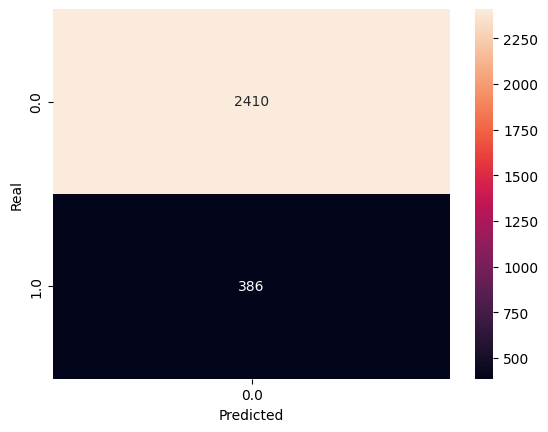

In [63]:
# Matriz de confusión

confusion_matrix = pd.crosstab(df_resultado['Y_Real'],
                               df_resultado['Y_Prediccion'],
                               rownames=['Real'],
                               colnames=['Predicted'])
confusion_matrix
sns.heatmap(confusion_matrix, annot=True, fmt='g')
plt.show()

## Comparacion con un modelo de arboles de Decision

In [97]:
profundidad = 23

# Entrenamiento del modelo.
clasificador = DecisionTreeClassifier( max_depth=profundidad,
                                      criterion="entropy",
                                      random_state=0)
clasificador.fit(X_train, y_train)
print("La profundida del árbol es: {}".format(clasificador.get_depth()))


# Predicción y evaluación sobre el conjunto de entrenamiento.
y_pred_train = clasificador.predict(X_train)
exactitud_train = accuracy_score(y_train, y_pred_train)*100
print("Exactitud conjunto de entrenamiento: {:4.2f}%".format(exactitud_train))


# Predicción y evaluación sobre el conjunto de prueba.
y_pred_test = clasificador.predict(X_test)
exactitud_test = accuracy_score(y_test, y_pred_test)*100
print("Exactitud conjunto de prueba: {:4.2f}%".format(exactitud_test),'\n')

La profundida del árbol es: 42
Exactitud conjunto de entrenamiento: 92.47%
Exactitud conjunto de prueba: 87.20% 



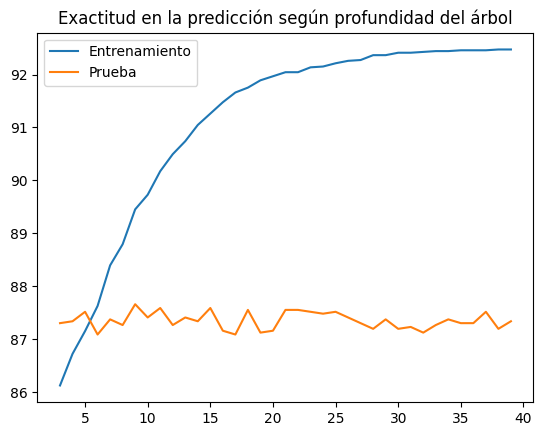

In [93]:
# Entrenamiento y prueba del modelo con distintos niveles de profunidad

clf = {}
y_pred_train = {}
y_pred_test = {}
exactitud_train={}
exactitud_test = {}

for p in range(3,40):
    # Entrenamiento del modelo
    clf[p] = DecisionTreeClassifier(max_depth = p,
                               criterion = "entropy",
                               random_state = 0).fit(X_train, y_train)

    # Predicción y evaluación sobre el conjunto de entrenamiento
    y_pred_train[p] = clf[p].predict(X_train)
    exactitud_train[p] = accuracy_score(y_train, y_pred_train[p])*100

    # Predicción y evaluación sobre el conjunto de prueba
    y_pred_test[p] = clf[p].predict(X_test)
    exactitud_test[p] = accuracy_score(y_test, y_pred_test[p])*100

exactitud_df = pd.DataFrame( {'Entrenamiento':exactitud_train,
                           'Prueba': exactitud_test})

exactitud_df.plot.line(
    title ='Exactitud en la predicción según profundidad del árbol')
plt.show()

## Comparacion con un modelo Bosque Aleatorio.

In [72]:
clf_rf = RandomForestClassifier(n_estimators=1000,  random_state =0,
                                criterion='entropy').fit(X_train, y_train)


y_pred = clf_rf.predict(X_test)
print("Exactitud del modelo Bosque Aleatorio en el conjunto de prueba: {:4.2f}%".format(accuracy_score(y_test, y_pred)*100))

Exactitud del modelo Bosque Aleatorio en el conjunto de prueba: 88.34%


## Comparacion de Modelos.

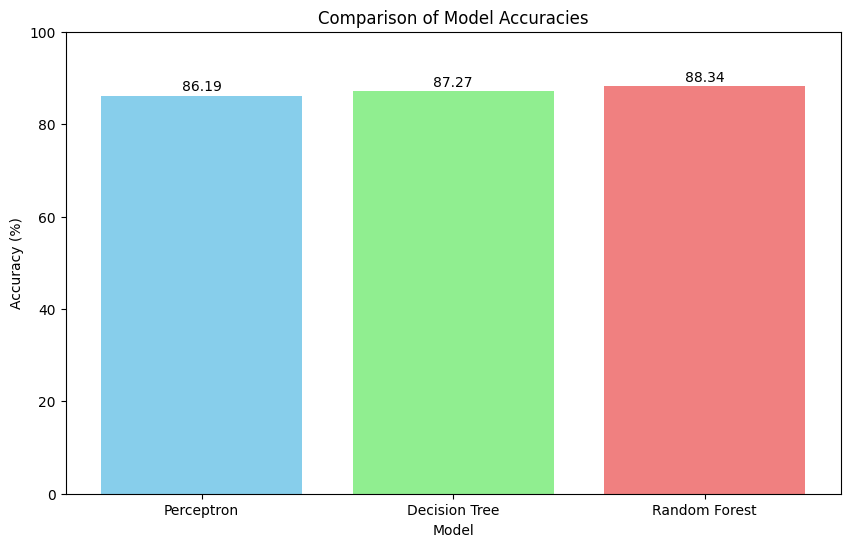

In [95]:
accuracy_scores = []

# Perceptron
model_perceptron = Perceptron(max_iter=1000, random_state=0, verbose=False)
model_perceptron.fit(X_train, y_train)
accuracy_perceptron = model_perceptron.score(X_test, y_test) * 100
accuracy_scores.append(accuracy_perceptron)


# Decision Tree
model_decision_tree = DecisionTreeClassifier(max_depth=12, criterion="entropy", random_state=0)
model_decision_tree.fit(X_train, y_train)
accuracy_decision_tree = accuracy_score(y_test, model_decision_tree.predict(X_test)) * 100
accuracy_scores.append(accuracy_decision_tree)


# Random Forest
model_random_forest = RandomForestClassifier(n_estimators=1000, random_state=0, criterion='entropy')
model_random_forest.fit(X_train, y_train)
accuracy_random_forest = accuracy_score(y_test, model_random_forest.predict(X_test)) * 100
accuracy_scores.append(accuracy_random_forest)

# Create the plot
models = ['Perceptron', 'Decision Tree', 'Random Forest']
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color=['skyblue', 'lightgreen', 'lightcoral'])
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")
plt.title("Comparison of Model Accuracies")
plt.ylim(0, 100)
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 1, str(round(v, 2)), ha='center')
plt.show()


## Conclusion

#### En Conclusion, el Perceptrón, el Árbol de Decisión y el Bosque Aleatorio se probaron con los mismos datos, pero dieron resultados distintos.  
#### El Bosque Aleatorio fue el que mejor se desempeñó, seguido del Árbol de Decisión, mientras que el Perceptrón se quedó atrás.  

#### La diferencia en rendimiento se debe a la forma en que cada modelo aprende.
#### El Perceptrón es sencillo ajusta pesos para minimizar errores y mejorar la clasificación, aprendiendo con cada iteración.
#### El Árbol de Decisión puede ser más preciso, pero se puede enredar si la profundidad es muy grande.
#### El Bosque Aleatorio es conjunto de árboles trabajando juntos: cada árbol tiene su opinión y juntando todas las opiniones, por eso saco mejores resultados.
